# Load and Analyse Dataset

## Import Libraries 


In [1]:
import os #file handling 
from  PIL import Image #read images
import matplotlib.pyplot as plt #visual
import torch #pytorch tensor conversion
import numpy as np 

## Load Paths 

In [2]:
image_dir=r"D:\Documents\Projects Kaggle\med-vision-ai\Common Carotid Artery Ultrasound Images\US images"
mask_dir=r"D:\Documents\Projects Kaggle\med-vision-ai\Common Carotid Artery Ultrasound Images\Expert mask images"

#List of both folder  files

In [3]:
images_files=sorted(os.listdir(image_dir))
mask_files=sorted(os.listdir(mask_dir))

In [4]:
print(f"Total images :{len(images_files)}")
print(f"Total masks :{len(mask_files)}")


Total images :1100
Total masks :1100


## Load random image


In [5]:
torch.manual_seed(42)

In [6]:
index=torch.randint(low=0,high=len(images_files),size=(1,))
index 

tensor([842])

In [7]:
image_name=images_files[index]
print(image_name)
mask_name=images_files[index]
print(mask_name)

202202071309230021EM VASCULAR_slice_124.png
202202071309230021EM VASCULAR_slice_124.png


In [8]:
if (image_name==mask_name):
    image_path=os.path.join(image_dir,image_name)
    mask_path=os.path.join(mask_dir,mask_name)
    image=Image.open(image_path)
    mask=Image.open(mask_path)
else:
    Print("Image and Mask are not equal files names")

In [9]:
print(f"Image Mode :{image.mode} and Maks Mode : {mask.mode}")
print(f"Image Size :{image.size} and Maks Size : {mask.size}")

Image Mode :RGB and Maks Mode : L
Image Size :(709, 749) and Maks Size : (709, 749)


## Convert to Numpy

In [10]:
image_np=np.array(image)
mask_np=np.array(mask)

print("Image shape:", image_np.shape)
print("Image dtype:", image_np.dtype)

print("Mask shape :", mask_np.shape)
print("Mask dtype :", mask_np.dtype)


Image shape: (749, 709, 3)
Image dtype: uint8
Mask shape : (749, 709)
Mask dtype : uint8


In [11]:
# Check pixel value ranges
print("Image min:", image_np.min())
print("Image max:", image_np.max())
print("Unique mask values:", np.unique(image_np))

Image min: 0
Image max: 255
Unique mask values: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145
 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163
 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181
 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199
 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217
 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235
 23

In [12]:
print("Unique mask values:", np.unique(mask_np))


Unique mask values: [  0 255]


In [13]:
image_np.shape

(749, 709, 3)

## Visualize image and mask

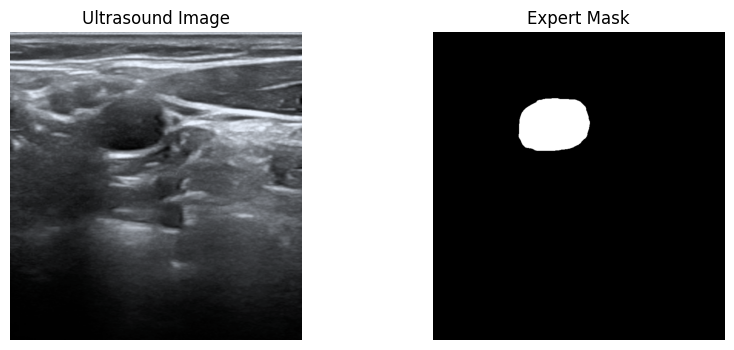

In [14]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(image_np,cmap="gray")
plt.title("Ultrasound Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(mask_np, cmap="gray")
plt.title("Expert Mask")
plt.axis("off")

plt.show()

# Create DataSet Class 
 

In [15]:
from torch.utils.data import Dataset,DataLoader
from torchvision import transforms
class CarotidDataset(Dataset):
    def __init__(self,images_dir,mask_dir,size=(512,512)):
        super().__init__()
        self.images_dir=images_dir
        self.mask_dir=mask_dir

        self.image_files=sorted(os.listdir(images_dir))
        # self.mask_files=sorted(os.listdir(mask_dir))
        self.image_transform=transforms.Compose([
            transforms.Resize(size),
            transforms.ToTensor() #convert into channels
        ])
        self.mask_transform=transforms.Compose([
            transforms.Resize(size,interpolation=transforms.InterpolationMode.NEAREST),
            transforms.ToTensor() #convert into channels
        ])

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self,index):
        #load image
        image_name = self.image_files[index]
        image_path=os.path.join(self.images_dir,image_name) #(dir,name)
        mask_path=os.path.join(self.mask_dir,image_name) #(dir,name)

         # Safety check
        assert os.path.exists(mask_path), f"Mask not found for {image_name}"

        #load in PIL image accept for torch  and convert into a grayscale 
        image=Image.open(image_path).convert("L") #.convert("L") ensures grayscale always
        mask=Image.open(mask_path).convert("L")

        # #Convert to NumPy
        # image=np.array(image,dtype=np.float32)
        # mask=np.array(mask,dtype=np.float32)

        # #Normalize image from 0 to 1
        # image=image/255.0
        # # mask image value 0 or 1
        # mask=mask/255.0

        # # Add channel dimension
        # image = torch.from_numpy(image).unsqueeze(0)
        # mask  = torch.from_numpy(mask).unsqueeze(0)
        image=self.image_transform(image)
        mask=self.mask_transform(mask)

        return image,mask





In [16]:
dataset = CarotidDataset(image_dir, mask_dir)
img, msk = dataset[0]

print(img.shape)
print(msk.shape)
print(img.min(), img.max())
print(torch.unique(msk))

torch.Size([1, 512, 512])
torch.Size([1, 512, 512])
tensor(0.) tensor(0.9608)
tensor([0., 1.])


## Dataset Loader


In [17]:
train_loader=DataLoader(dataset,batch_size=4,shuffle=True,pin_memory=True)

## Inspect one batch

In [18]:
images,masks=next(iter(train_loader))
print("Images batch shape:", images.shape)
print("Masks batch shape :", masks.shape)

Images batch shape: torch.Size([4, 1, 512, 512])
Masks batch shape : torch.Size([4, 1, 512, 512])


## Visualize a batch sample

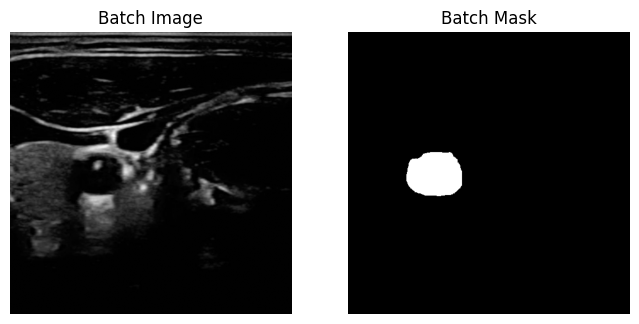

In [19]:
img = images[0][0]   # first  batch & channel image value
msk = masks[0][0] ## first  batch & channel mask value

plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.imshow(img, cmap="gray")
plt.title("Batch Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(msk, cmap="gray")
plt.title("Batch Mask")
plt.axis("off")

plt.show()

# Load  GPU

In [20]:
device = "cuda" if torch.cuda.is_available() else "cpu"


## Lets test forward pass 


In [21]:
# from  UNetModel import UNet
# model = UNet(in_channels=1, out_channels=1)
# images, masks = next(iter(train_loader))
# images.to(device)
# masks.to(device)
# outputs = model(images).to(device)

# print(images.shape)
# print(outputs.shape)
# print(masks.shape)


# Train and evaluate model and see acuracy 


# Train / Val / Test Split

## Create indices split

In [22]:
from sklearn.model_selection import train_test_split

indices = list(range(len(dataset)))

train_idx, temp_idx = train_test_split(
    indices, test_size=0.3, random_state=42
)

val_idx, test_idx = train_test_split(
    temp_idx, test_size=0.5, random_state=42
)


## Create Subsets

In [23]:
from torch.utils.data import Subset

train_dataset = Subset(dataset, train_idx)
val_dataset   = Subset(dataset, val_idx)
test_dataset  = Subset(dataset, test_idx)


## DataLoaders

In [24]:
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True, pin_memory=True)
val_loader   = DataLoader(val_dataset, batch_size=4, shuffle=False)
test_loader  = DataLoader(test_dataset, batch_size=4, shuffle=False)


## Improve Loss (Medical-grade)
BCE alone is not enough , Background dominates and ice focuses on overlap

### Dice Loss

In [25]:
def dice_loss(pred, target, smooth=1.0):
    pred = torch.sigmoid(pred)
    pred = pred.view(-1)
    target = target.view(-1)

    intersection = (pred * target).sum()
    dice = (2. * intersection + smooth) / (pred.sum() + target.sum() + smooth)

    return 1 - dice


### Combined Loss

In [26]:
def combined_loss(pred, target):
    bce = torch.nn.functional.binary_cross_entropy_with_logits(pred, target)
    dsc = dice_loss(pred, target)
    return bce + dsc


## Early Stopping (Early-Bird Concept)

In [27]:
class EarlyStopping:
    def __init__(self, patience=5):
        self.patience = patience
        self.counter = 0
        self.best_loss = None
        self.early_stop = False

    def __call__(self, val_loss):
        if self.best_loss is None or val_loss < self.best_loss:
            self.best_loss = val_loss
            self.counter = 0
        else:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True


## Full Training Loop

In [ ]:
from UNetModel import UNet
model = UNet(in_channels=1, out_channels=1).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

early_stopping = EarlyStopping(patience=6)

train_losses, val_losses = [], []

epochs = 10

for epoch in range(epochs):
    # Training
    model.train()
    train_loss = 0.0

    for images, masks in train_loader:
        images = images.to(device)
        masks = masks.to(device)

        outputs = model(images)
        loss = combined_loss(outputs, masks)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    train_loss /= len(train_loader)
    train_losses.append(train_loss)

    # validation
    model.eval()
    val_loss = 0.0

    with torch.no_grad():
        for images, masks in val_loader:
            images = images.to(device)
            masks = masks.to(device)

            outputs = model(images)
            loss = combined_loss(outputs, masks)
            val_loss += loss.item()

    val_loss /= len(val_loader)
    val_losses.append(val_loss)

    print(f"Epoch [{epoch+1}/{epochs}] "
          f"Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f}")

    early_stopping(val_loss)
    if early_stopping.early_stop:
        print("Early stopping triggered")
        break


Epoch [1/10] Train Loss: 1.1335 | Val Loss: 1.0435
Epoch [2/10] Train Loss: 1.0348 | Val Loss: 0.9073
Epoch [3/10] Train Loss: 0.9374 | Val Loss: 0.7054
Epoch [4/10] Train Loss: 0.5743 | Val Loss: 0.7682
Epoch [5/10] Train Loss: 0.3754 | Val Loss: 0.3121
Epoch [6/10] Train Loss: 0.2442 | Val Loss: 0.2474
Epoch [7/10] Train Loss: 0.1952 | Val Loss: 0.1657
Epoch [8/10] Train Loss: 0.1659 | Val Loss: 0.1452
Epoch [9/10] Train Loss: 0.1440 | Val Loss: 0.1872
Epoch [10/10] Train Loss: 0.1399 | Val Loss: 0.1320


## Plot Training Curves

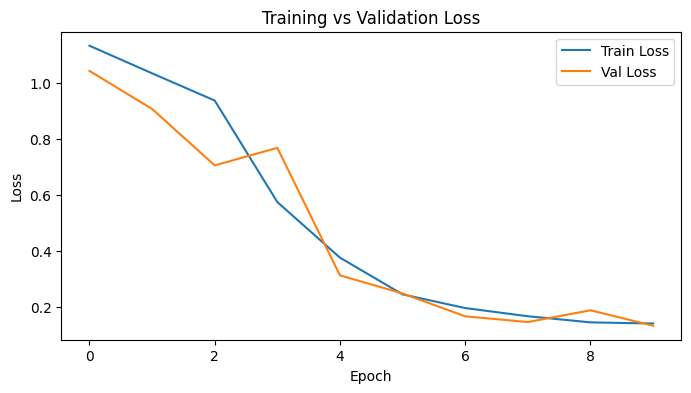

In [29]:
plt.figure(figsize=(8,4))
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()


## Evaluate on Test Set (Dice Score)

In [30]:
def dice_score(pred, target):
    pred = (torch.sigmoid(pred) > 0.5).float()
    intersection = (pred * target).sum()
    return (2 * intersection) / (pred.sum() + target.sum() + 1e-8)


In [31]:
model.eval()
dice_scores = []

with torch.no_grad():
    for images, masks in test_loader:
        images = images.to(device)
        masks = masks.to(device)

        outputs = model(images)
        dice = dice_score(outputs, masks)
        dice_scores.append(dice.item())

print("Mean Dice Score:", np.mean(dice_scores))


Mean Dice Score: 0.8878039050669897


## Final Prediction Visualization

In [32]:

model.eval()
with torch.no_grad():
    images, masks = next(iter(test_loader))
    images = images.to(device)
    masks = masks.to(device)

    outputs = model(images)
    preds = (torch.sigmoid(outputs) > 0.5).float()


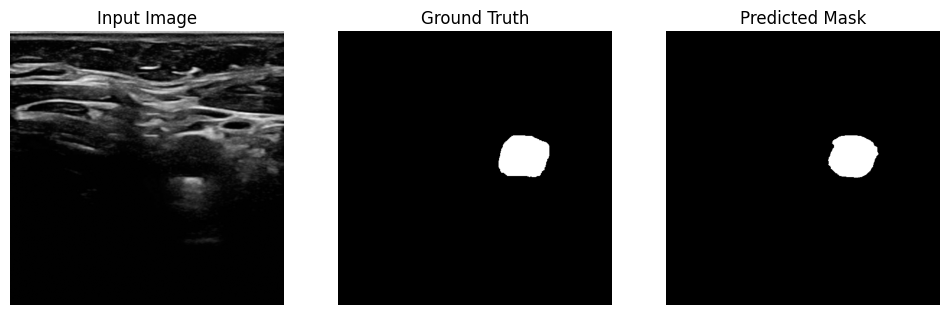

In [33]:
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(images[0][0].cpu(), cmap="gray")
plt.title("Input Image")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(masks[0][0].cpu(), cmap="gray")
plt.title("Ground Truth")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(preds[0][0].cpu(), cmap="gray")
plt.title("Predicted Mask")
plt.axis("off")

plt.show()


## Helping Material 

https://www.kaggle.com/datasets/orvile/carotid-ultrasound-images

https://www.kaggle.com/datasets/orvile/carotid-ultrasound-images/code
